# Age, Qualification and Occupation
年龄、教育和职业之间的关系：探讨不同年龄组内教育水平对职业选择的影响，以及如何随时间变化。这可以揭示教育如何影响个人的职业生涯路径，以及年龄结构的变化对劳动市场的潜在影响。

这里主要使用2021人口普查数据。

- 数据整理：我们首先需要整理和准备相关的数据列，包括年龄组、教育水平和职业类别。这可能包括将数据分组、计算每个组别的人口比例等。

- 数据分析：接下来，我们将分析不同年龄组内教育水平对职业选择的影响。这涉及到比较不同教育水平群体在不同职业领域的分布情况，以及这种分布如何随年龄和时间变化。

- 可视化：为了更好地理解和展示分析结果，我们将使用图表来可视化不同年龄组、教育水平和职业类别之间的关系。这可能包括堆叠条形图、散点图或热图等，以展示这些维度之间的相互作用和趋势。

- 结果解释：基于可视化和分析结果，我们将探讨教育如何影响职业路径，以及人口年龄结构的变化对劳动市场的潜在影响。我们还将讨论这些发现对教育政策和劳动市场规划的意义。

## 1. Load Data
Use 2021 Census data for this problem.
Do some data cleaning and select the columns of interest.

In [1]:
import pandas as pd

In [2]:
# load data
df= pd.read_csv('./datasets2021/Merged.csv')
df

,geography,geography code,Age: 0-14,Age: 15-24,Age: 25-44,Age: 45-64,Age: 65+,Qualification: Total,Qualification: No,Qualification: Level 1,...,All_Occupation: All categories,"All_Occupation: Managers, directors and senior officials",All_Occupation: Professional occupations,All_Occupation: Associate professional and technical occupations,All_Occupation: Administrative and secretarial occupations,All_Occupation: Skilled trades occupations,"All_Occupation: Caring, leisure and other service occupations",All_Occupation: Sales and customer service occupations,"All_Occupation: Process, plant and machine operatives",All_Occupation: Elementary occupations
0,Hartlepool,E06000001,16484,10290,21907,25423,18233,74686,17286,7076,...,37749,3348,5838,4497,3391,4736,4381,3613,3622,4323
1,Middlesbrough,E06000002,28188,18742,38061,34755,24180,113939,27282,11221,...,56434,4409,8996,6109,4856,5906,7578,5394,5577,7609
2,Redcar and Cleveland,E06000003,22681,13699,30225,38181,31747,112342,24732,10983,...,55623,4801,8411,6605,4983,6800,7430,4760,5345,6488
3,Stockton-on-Tees,E06000004,36183,20306,50071,52851,37184,158010,29441,15324,...,86442,8985,16671,10903,8413,8868,8858,7330,6993,9421
4,Darlington,E06000005,18452,11211,26551,29547,22040,88107,16972,8276,...,49296,5230,8463,5973,4961,5042,4895,4657,3847,6228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Torfaen,W06000020,16059,9583,23030,24447,19157,75113,16631,7697,...,40657,3949,6130,4982,4181,4788,4691,3462,3916,4558
170,Monmouthshire,W06000021,13759,8440,19165,27553,24040,78239,12315,6463,...,42830,6573,9315,5427,3794,4895,3538,2824,2485,3979
171,Newport,W06000022,30284,17410,44696,40142,27060,127423,27690,11741,...,72786,7420,13767,9109,7623,6347,6761,6534,6140,9085
172,Powys,W06000023,19267,12116,26113,38553,37119,112536,21316,9694,...,61726,7396,9056,6334,5038,12196,6553,4217,4610,6326


In [14]:
# select columns
columns_of_interest = [
    'Age: 0-14', 'Age: 15-24', 'Age: 25-44', 'Age: 45-64', 'Age: 65+', 
    'Qualification: No', 'Qualification: Level 1', 'Qualification: Level 2', 
    'Qualification: Apprenticeship', 'Qualification: Level 3', 'Qualification: Level 4 and above', 'Qualification: Other',
     'All_Occupation: Managers, directors and senior officials', 
    'All_Occupation: Professional occupations', 'All_Occupation: Associate professional and technical occupations', 
    'All_Occupation: Administrative and secretarial occupations', 'All_Occupation: Skilled trades occupations', 
    'All_Occupation: Caring, leisure and other service occupations', 'All_Occupation: Sales and customer service occupations', 
    'All_Occupation: Process, plant and machine operatives', 'All_Occupation: Elementary occupations'
]

df2= df[columns_of_interest]
df2

,Age: 0-14,Age: 15-24,Age: 25-44,Age: 45-64,Age: 65+,Qualification: No,Qualification: Level 1,Qualification: Level 2,Qualification: Apprenticeship,Qualification: Level 3,...,Qualification: Other,"All_Occupation: Managers, directors and senior officials",All_Occupation: Professional occupations,All_Occupation: Associate professional and technical occupations,All_Occupation: Administrative and secretarial occupations,All_Occupation: Skilled trades occupations,"All_Occupation: Caring, leisure and other service occupations",All_Occupation: Sales and customer service occupations,"All_Occupation: Process, plant and machine operatives",All_Occupation: Elementary occupations
0,16484,10290,21907,25423,18233,17286,7076,10963,5205,13776,...,1854,3348,5838,4497,3391,4736,4381,3613,3622,4323
1,28188,18742,38061,34755,24180,27282,11221,15270,7040,19976,...,3023,4409,8996,6109,4856,5906,7578,5394,5577,7609
2,22681,13699,30225,38181,31747,24732,10983,15663,8692,21300,...,2969,4801,8411,6605,4983,6800,7430,4760,5345,6488
3,36183,20306,50071,52851,37184,29441,15324,23005,10565,29004,...,4023,8985,16671,10903,8413,8868,8858,7330,6993,9421
4,18452,11211,26551,29547,22040,16972,8276,12733,6215,16141,...,2253,5230,8463,5973,4961,5042,4895,4657,3847,6228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,16059,9583,23030,24447,19157,16631,7697,11458,4311,12736,...,2152,3949,6130,4982,4181,4788,4691,3462,3916,4558
170,13759,8440,19165,27553,24040,12315,6463,10589,3958,12172,...,1933,6573,9315,5427,3794,4895,3538,2824,2485,3979
171,30284,17410,44696,40142,27060,27690,11741,18188,6498,19978,...,3784,7420,13767,9109,7623,6347,6761,6534,6140,9085
172,19267,12116,26113,38553,37119,21316,9694,16747,6868,19125,...,2937,7396,9056,6334,5038,12196,6553,4217,4610,6326


In [10]:
# check missing values
df2.isnull().sum()
# there is no missing value

geography                                                           0
Age: 0-14                                                           0
Age: 15-24                                                          0
Age: 25-44                                                          0
Age: 45-64                                                          0
Age: 65+                                                            0
Qualification: No                                                   0
Qualification: Level 1                                              0
Qualification: Level 2                                              0
Qualification: Apprenticeship                                       0
Qualification: Level 3                                              0
Qualification: Level 4 and above                                    0
Qualification: Other                                                0
All_Occupation: Managers, directors and senior officials            0
All_Occupation: Prof

## 2. PCA Projection

In [15]:
# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)
df2_scaled = pd.DataFrame(df2_scaled, columns=df2.columns)
df2_scaled

,Age: 0-14,Age: 15-24,Age: 25-44,Age: 45-64,Age: 65+,Qualification: No,Qualification: Level 1,Qualification: Level 2,Qualification: Apprenticeship,Qualification: Level 3,...,Qualification: Other,"All_Occupation: Managers, directors and senior officials",All_Occupation: Professional occupations,All_Occupation: Associate professional and technical occupations,All_Occupation: Administrative and secretarial occupations,All_Occupation: Skilled trades occupations,"All_Occupation: Caring, leisure and other service occupations",All_Occupation: Sales and customer service occupations,"All_Occupation: Process, plant and machine operatives",All_Occupation: Elementary occupations
0,-0.902104,-0.930243,-1.005101,-0.859683,-0.764996,-0.832403,-0.846846,-0.811186,-0.741463,-0.832917,...,-0.962406,-0.886199,-0.978040,-0.925635,-0.904161,-0.806531,-0.879808,-0.914495,-0.857257,-0.972408
1,-0.656645,-0.667475,-0.769203,-0.732470,-0.664677,-0.583628,-0.669709,-0.678625,-0.600929,-0.678755,...,-0.769439,-0.831026,-0.860962,-0.835441,-0.788030,-0.725475,-0.613515,-0.720181,-0.634637,-0.714362
2,-0.772139,-0.824259,-0.883632,-0.685768,-0.537030,-0.647091,-0.679880,-0.666529,-0.474409,-0.645834,...,-0.778353,-0.810641,-0.882650,-0.807689,-0.777963,-0.663541,-0.625843,-0.789353,-0.661055,-0.802393
3,-0.488972,-0.618851,-0.593820,-0.485788,-0.445313,-0.529896,-0.494366,-0.440555,-0.330964,-0.454275,...,-0.604370,-0.593069,-0.576422,-0.567207,-0.506067,-0.520273,-0.506898,-0.508956,-0.473394,-0.572068
4,-0.860830,-0.901609,-0.937284,-0.803465,-0.700776,-0.840218,-0.795564,-0.756709,-0.664112,-0.774112,...,-0.896543,-0.788333,-0.880722,-0.843050,-0.779707,-0.785332,-0.836995,-0.800590,-0.831635,-0.822811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,-0.911017,-0.952223,-0.988702,-0.872987,-0.749410,-0.848705,-0.820308,-0.795951,-0.809931,-0.858777,...,-0.913215,-0.854946,-0.967215,-0.898499,-0.841537,-0.802929,-0.853987,-0.930969,-0.823778,-0.953954
170,-0.959253,-0.987758,-1.045142,-0.830647,-0.667039,-0.956119,-0.873043,-0.822697,-0.836966,-0.872801,...,-0.949365,-0.718496,-0.849136,-0.873600,-0.872215,-0.795516,-0.950026,-1.000578,-0.986729,-0.999422
171,-0.612687,-0.708886,-0.672312,-0.659035,-0.616094,-0.573474,-0.647486,-0.588814,-0.642438,-0.678705,...,-0.643822,-0.674451,-0.684084,-0.667585,-0.568690,-0.694924,-0.681567,-0.595803,-0.570527,-0.598453
172,-0.843738,-0.873473,-0.943680,-0.680696,-0.446410,-0.732107,-0.734965,-0.633165,-0.614101,-0.699915,...,-0.783635,-0.675699,-0.858738,-0.822852,-0.773603,-0.289715,-0.698892,-0.848596,-0.744751,-0.815115


In [41]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df2_pca = pca.fit_transform(df2_scaled)

# Projection Matrix
df2_pca = pd.DataFrame(df2_pca, columns=['PC1', 'PC2'])
df2_pca

# 添加geography列作为第一列
df2_pca.insert(0, 'geography', df['geography'])
df2_pca

,geography,PC1,PC2
0,Hartlepool,-4.059995,-0.243926
1,Middlesbrough,-3.279847,-0.339449
2,Redcar and Cleveland,-3.333665,-0.398954
3,Stockton-on-Tees,-2.384939,-0.224462
4,Darlington,-3.753552,-0.180598
...,...,...,...
169,Torfaen,-4.019437,-0.209071
170,Monmouthshire,-4.078105,0.045343
171,Newport,-2.945182,-0.145168
172,Powys,-3.334000,-0.292784


### `pca.components_`
- **定义**：`pca.components_`表示主成分的方向向量，即PCA变换的基向量。在PCA模型中，这些成分是从原始特征空间提取出来的，代表了数据方差最大的方向。
- **组成**：如果你执行了`PCA(n_components=k)`，那么`pca.components_`将是一个形状为`(k, n)`的数组，其中`k`是你选择的主成分数量，`n`是原始数据集中的特征数量。
- **用途**：这些成分可以帮助你理解每个主成分是如何从原始特征组合而来的，即它们提供了主成分与原始特征之间的关系。每个成分中的值可以视为该主成分中各个原始特征的权重。

### `pca.fit_transform()`的结果
- **定义**：`pca.fit_transform()`方法将原始数据集转换到由主成分构成的新特征空间中。这个过程涉及将数据投影到`pca.components_`定义的主成分上，从而得到降维后的数据表示。
- **组成**：如果你执行了`PCA(n_components=k)`并对`n_samples`个样本使用`fit_transform()`，那么结果将是一个形状为`(n_samples, k)`的数组，其中每一行都是原始数据在新的主成分特征空间中的表示。
- **用途**：这个转换后的数据集可以用于后续的数据分析和建模，例如聚类、分类等。它提供了一种压缩的数据表示形式，保留了数据中最重要的变异信息，同时减少了特征的数量。

### 区别
- `pca.components_`提供了主成分的方向和原始特征的贡献度，是一种解释PCA模型和理解数据结构的工具。
- `pca.fit_transform()`得到的结果（如`df2_pca`）是原始数据转换到主成分空间后的低维表示，用于后续的数据分析和模型构建。

简而言之，`pca.components_`告诉我们主成分是如何构建的，而`pca.fit_transform()`的结果告诉我们原始数据在这些主成分构成的空间中的位置。

In [34]:
# loadings
pca_matrix = pca.components_

# 将投影矩阵（载荷）转换为DataFrame以便于解释
loading_matrix = pd.DataFrame(pca_matrix, columns=df2.columns, index=['PCA1', 'PCA2'])

loading_matrix

,Age: 0-14,Age: 15-24,Age: 25-44,Age: 45-64,Age: 65+,Qualification: No,Qualification: Level 1,Qualification: Level 2,Qualification: Apprenticeship,Qualification: Level 3,...,Qualification: Other,"All_Occupation: Managers, directors and senior officials",All_Occupation: Professional occupations,All_Occupation: Associate professional and technical occupations,All_Occupation: Administrative and secretarial occupations,All_Occupation: Skilled trades occupations,"All_Occupation: Caring, leisure and other service occupations",All_Occupation: Sales and customer service occupations,"All_Occupation: Process, plant and machine operatives",All_Occupation: Elementary occupations
PCA1,0.221377,0.213490,0.218202,0.223706,0.216549,0.217278,0.222311,0.222137,0.216146,0.222593,...,0.221626,0.211945,0.210295,0.216295,0.222036,0.218648,0.223250,0.222637,0.212247,0.216398
PCA2,0.058074,0.079276,0.202737,-0.002001,-0.144225,-0.232566,-0.147112,-0.115250,-0.253413,-0.057677,...,-0.031848,0.334372,0.438433,0.320774,0.071665,-0.158571,-0.080739,-0.104715,-0.351077,-0.189151


In [35]:
# 分析和解释主成分
# 选取每个主成分中载荷绝对值最大的几个特征，以解释这些主成分代表的意义
top_features_per_component = loading_matrix.abs().idxmax(axis=1)
top_features_per_component

PCA1                                  Age: 45-64
PCA2    All_Occupation: Professional occupations
dtype: object

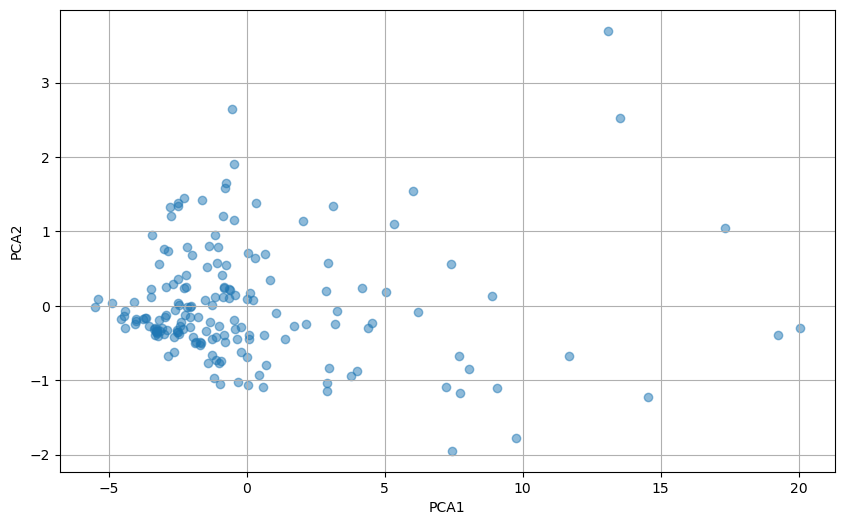

PCA1 explains 0.9419570753433292 of the variance
PCA2 explains 0.029173024078088982 of the variance


In [36]:
import matplotlib.pyplot as plt

# 对原始数据进行降维处理后的结果可视化
# 使用散点图，用原数据在pca投影的2个维度上的值来表示每个样本

plt.figure(figsize=(10, 6))
plt.scatter(df2_pca['PC1'], df2_pca['PC2'], alpha=0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()

# 解释主成分
print("PCA1 explains", pca.explained_variance_ratio_[0], "of the variance")
print("PCA2 explains", pca.explained_variance_ratio_[1], "of the variance")